In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [277]:
def zero(a, b):
    return 0

def attack(enemy, base):
    enemyCoef = 10 * (5 - enemy)
    return np.clip(30 + enemyCoef - np.exp(base - 2), 0, 100)

def random_walk():
    return 40

def flee_to_base_without_ally(ally, base):
    allyCoef = np.clip(-10 * (4 - ally), -100, 0)
    baseCoef = np.exp((base - 2)) if allyCoef == 0 else np.exp(0.1 * (base - 2))
    return np.clip(30 + allyCoef + baseCoef, 0, 100);

def flee_to_base_from_enemy(enemy, base):
    enemyCoef = (3 - enemy)
    return np.clip(30 + enemyCoef * np.exp(0.5 * (base - 2)), 0, 50)


ENEMY = np.arange(0, 10, 0.05)
ALLY = np.arange(0, 10, 0.05)
BASE = np.arange(0, 10, 0.05)

In [278]:
def visualize(axis1, axis2, axis1_name, axis2_name, calc_utility):
    img = np.zeros((axis1.shape[0], axis2.shape[0]))
    ht = np.zeros((4, axis1.shape[0], axis2.shape[0]))
    # TODO: Vectorize
    for x, ax1_v in enumerate(axis1):
        for y, ax2_v in enumerate(axis2):
            utility = np.array([])
            utility = calc_utility(ax1_v, ax2_v)
            for i in range(utility.shape[0]):
                ht[i][y][x] = utility[i]
            img[y][x] = np.argmax(utility)


    fig, ax = plt.subplots()
    im = ax.imshow(img, extent=[0, 10, 10, 0])
    ax.set_aspect('auto')
    ax.set_xlabel(axis1_name)
    ax.set_ylabel(axis2_name)

    plt.colorbar(im)

    fig, ax = plt.subplots(2, 2)
    for i in range(4):
        im = ax[i %2, i // 2].imshow(ht[i], extent=[0, 10, 10, 0], cmap='Greys')
        ax[i %2, i // 2].set_aspect('auto')
        ax[i %2, i // 2].set_xlabel(axis1_name)
        ax[i %2, i // 2].set_ylabel(axis2_name)
        plt.colorbar(im)

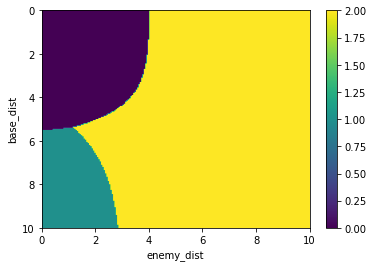

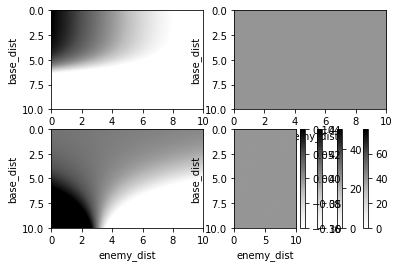

In [279]:
# Pirple - attack
# Yellow - random_walk or flee_to_base_without_ally
# Gren   - flee_to_base_from_enemy
utility = lambda a, b: np.array([attack(a, b), flee_to_base_from_enemy(a, b), random_walk()])
visualize(ENEMY, BASE, "enemy_dist", "base_dist", utility)

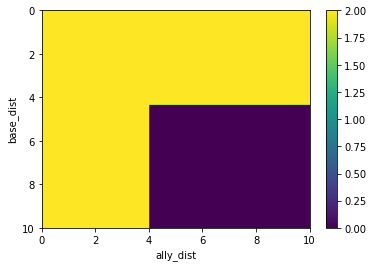

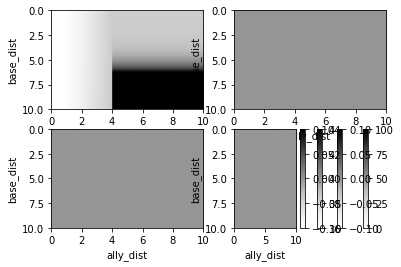

In [280]:
# Pirple - flee_to_base_without_ally
# Yellow - random_walk or attack
utility = lambda a, b: np.array([flee_to_base_without_ally(a, b), zero(a, b), random_walk()])
visualize(ALLY, BASE, "ally_dist", "base_dist", utility)

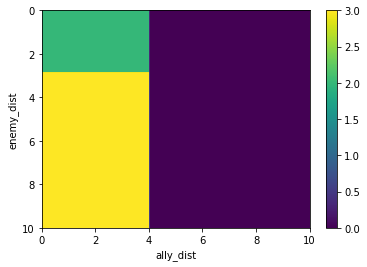

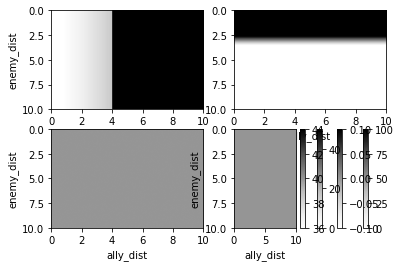

In [281]:
# When base is far
# Yellow - random_walk
# Pirple - flee_to_base_without_ally
# Green  - flee_to_base_from_enemy
utility = lambda a, b: np.array([flee_to_base_without_ally(a, 10.0), attack(b, 10.0), flee_to_base_from_enemy(b, 10.0), random_walk()])
visualize(ALLY, ENEMY, "ally_dist", "enemy_dist", utility)

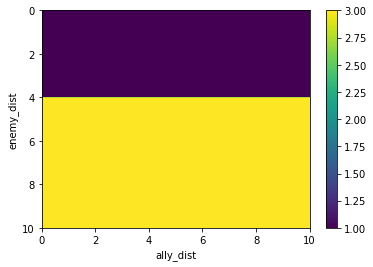

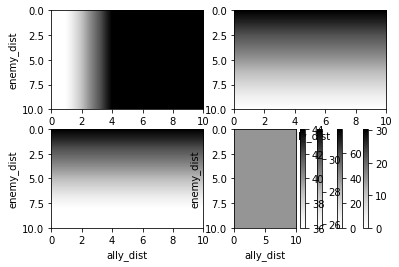

In [283]:
# When base is close
# Yellow - random_walk
# Pirple - attack
utility = lambda a, b: np.array([flee_to_base_without_ally(a, 1.0), attack(b, 1.0), flee_to_base_from_enemy(b, 1.0), random_walk()])
visualize(ALLY, ENEMY, "ally_dist", "enemy_dist", utility)